In [1]:
import yaml
import requests
import pandas as pd
import pprint
import sys
import datarobot as dr
sys.path.append("./utils")
from prediction_helper import *

In [2]:
df = pd.read_csv("./data/10K_LC_short.csv", encoding="latin-1")

In [3]:
with open("./model-c/model-config.yaml", "rb") as f:
    deployment_info = yaml.load(f, Loader=yaml.FullLoader)

In [4]:
predictions = make_datarobot_deployment_predictions(df.to_csv(index=False), deployment_info["deploymentID"])

In [5]:
pprint.pprint(predictions)

{'data': [{'deploymentApprovalStatus': 'PENDING',
           'prediction': '0',
           'predictionThreshold': 0.5,
           'predictionValues': [{'label': '1', 'value': 0.0130974747},
                                {'label': '0', 'value': 0.9869025253}],
           'rowId': 0},
          {'deploymentApprovalStatus': 'PENDING',
           'prediction': '0',
           'predictionThreshold': 0.5,
           'predictionValues': [{'label': '1', 'value': 0.0949393382},
                                {'label': '0', 'value': 0.9050606618}],
           'rowId': 1},
          {'deploymentApprovalStatus': 'PENDING',
           'prediction': '0',
           'predictionThreshold': 0.5,
           'predictionValues': [{'label': '1', 'value': 0.0204374305},
                                {'label': '0', 'value': 0.9795625695}],
           'rowId': 2},
          {'deploymentApprovalStatus': 'PENDING',
           'prediction': '0',
           'predictionThreshold': 0.5,
           'predictionV

In [6]:
deployment = dr.Deployment.get(deployment_info["deploymentID"])

ServiceStats(5ff7b5d13a24126a7c857223 | 2021-01-01 02:00:00+00:00 - 2021-01-08 02:00:00+00:00)

In [7]:
service_stats = deployment.get_service_stats()
service_stats.metrics

{'totalPredictions': 200,
 'userErrorRate': 0,
 'cacheHitRatio': 0.5,
 'executionTime': 121,
 'totalRequests': 2,
 'serverErrorRate': 0,
 'slowRequests': 0,
 'medianLoad': 0,
 'numConsumers': 1,
 'responseTime': 390,
 'peakLoad': 1}

In [8]:
dr.enums.DATA_DRIFT_METRIC.ALL

['psi', 'kl_divergence', 'dissimilarity', 'hellinger', 'js_divergence']

In [14]:
feature_drift = deployment.get_feature_drift(deployment.model["id"], metric = 'psi')
fd = pd.DataFrame([(f.name, f.feature_impact, f.drift_score) for f in feature_drift], columns = ["feature", "importance", "drift"])

<AxesSubplot:xlabel='importance', ylabel='drift'>

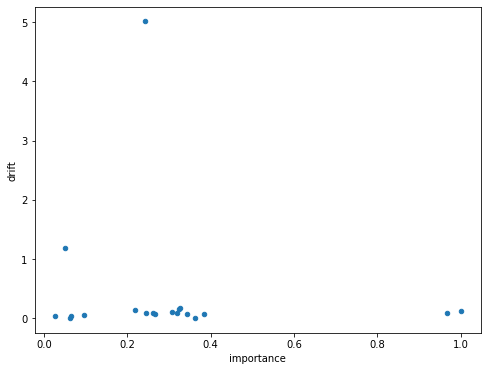

In [20]:
fd.plot.scatter(x="importance", y="drift", figsize=[8,6])